In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/widsdatathon2025/SAMPLE_SUBMISSION.xlsx
/kaggle/input/widsdatathon2025/Data Dictionary.xlsx
/kaggle/input/widsdatathon2025/TRAIN_OLD/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv
/kaggle/input/widsdatathon2025/TRAIN_OLD/TRAINING_SOLUTIONS.xlsx
/kaggle/input/widsdatathon2025/TRAIN_OLD/TRAIN_CATEGORICAL_METADATA.xlsx
/kaggle/input/widsdatathon2025/TRAIN_OLD/TRAIN_QUANTITATIVE_METADATA.xlsx
/kaggle/input/widsdatathon2025/TRAIN_NEW/TRAINING_SOLUTIONS.xlsx
/kaggle/input/widsdatathon2025/TRAIN_NEW/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv
/kaggle/input/widsdatathon2025/TRAIN_NEW/TRAIN_CATEGORICAL_METADATA_new.xlsx
/kaggle/input/widsdatathon2025/TRAIN_NEW/TRAIN_QUANTITATIVE_METADATA_new.xlsx
/kaggle/input/widsdatathon2025/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv
/kaggle/input/widsdatathon2025/TEST/TEST_CATEGORICAL.xlsx
/kaggle/input/widsdatathon2025/TEST/TEST_QUANTITATIVE_METADATA.xlsx


In [41]:
test_connectome=pd.read_csv(f"/kaggle/input/widsdatathon2025/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv")
test_categorical=pd.read_excel(f"/kaggle/input/widsdatathon2025/TEST/TEST_CATEGORICAL.xlsx")
test_quant=pd.read_excel(f"/kaggle/input/widsdatathon2025/TEST/TEST_QUANTITATIVE_METADATA.xlsx")

In [42]:
print(test_categorical.columns)
test_categorical.head()

Index(['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,Cfwaf5FX7jWK,2022,4,0.0,0.0,4,21.0,30.0,18.0,30.0
1,vhGrzmvA3Hjq,2023,4,0.0,0.0,4,21.0,45.0,NaN,30.0
2,ULliyEXjy4OV,2022,4,0.0,0.0,4,21.0,40.0,18.0,40.0
3,LZfeAb1xMtql,2022,4,0.0,0.0,3,21.0,45.0,21.0,45.0
4,EnFOUv0YK1RG,2022,4,2.0,0.0,4,18.0,0.0,21.0,45.0


In [43]:
test_quant.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,Cfwaf5FX7jWK,60.03,14.0,5.0,16.0,41.0,19.0,11.0,26.0,2.0,12.0,3.0,9.0,2.0,7.0,3.0,0.0,8.0,8.992813
1,vhGrzmvA3Hjq,86.71,12.0,3.0,13.0,43.0,18.0,15.0,28.0,2.0,16.0,8.0,5.0,7.0,3.0,11.0,3.0,9.0,12.324093
2,ULliyEXjy4OV,26.68,13.0,3.0,14.0,36.0,16.0,14.0,25.0,1.0,7.0,1.0,6.0,1.0,5.0,1.0,0.0,9.0,7.770933
3,LZfeAb1xMtql,93.38,13.0,3.0,19.0,41.0,17.0,18.0,27.0,4.0,15.0,4.0,10.0,8.0,6.0,5.0,1.0,6.0,9.304814
4,EnFOUv0YK1RG,-93.38,14.0,3.0,13.0,42.0,19.0,16.0,28.0,2.0,18.0,6.0,12.0,5.0,10.0,6.0,0.0,10.0,8.261350


In [44]:
test_cat_quant = pd.merge(test_categorical, test_quant, on='participant_id', how='inner')

In [45]:
train_connectome=pd.read_csv(f"/kaggle/input/widsdatathon2025/TRAIN_NEW/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv")
train_quant=pd.read_excel(f"/kaggle/input/widsdatathon2025/TRAIN_NEW/TRAIN_QUANTITATIVE_METADATA_new.xlsx")
train_categorical=pd.read_excel(f"/kaggle/input/widsdatathon2025/TRAIN_NEW/TRAIN_CATEGORICAL_METADATA_new.xlsx")
train_solution=pd.read_excel(f"/kaggle/input/widsdatathon2025/TRAIN_NEW/TRAINING_SOLUTIONS.xlsx")

In [46]:
train_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1170 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1159 non-null   float64
 5   MRI_Track_Scan_Location           1210 non-null   float64
 6   Barratt_Barratt_P1_Edu            1198 non-null   float64
 7   Barratt_Barratt_P1_Occ            1182 non-null   float64
 8   Barratt_Barratt_P2_Edu            1015 non-null   float64
 9   Barratt_Barratt_P2_Occ            991 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 94.9+ KB


In [47]:
train_quant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   participant_id              1213 non-null   object 
 1   EHQ_EHQ_Total               1200 non-null   float64
 2   ColorVision_CV_Score        1190 non-null   float64
 3   APQ_P_APQ_P_CP              1201 non-null   float64
 4   APQ_P_APQ_P_ID              1201 non-null   float64
 5   APQ_P_APQ_P_INV             1201 non-null   float64
 6   APQ_P_APQ_P_OPD             1201 non-null   float64
 7   APQ_P_APQ_P_PM              1201 non-null   float64
 8   APQ_P_APQ_P_PP              1201 non-null   float64
 9   SDQ_SDQ_Conduct_Problems    1204 non-null   float64
 10  SDQ_SDQ_Difficulties_Total  1204 non-null   float64
 11  SDQ_SDQ_Emotional_Problems  1204 non-null   float64
 12  SDQ_SDQ_Externalizing       1204 non-null   float64
 13  SDQ_SDQ_Generating_Impact   1204 

In [48]:
train_cat_quant = pd.merge(train_categorical, train_quant, on='participant_id', how='inner')

In [49]:
test_cat_quant['Dataset'] = 'Test'
train_cat_quant['Dataset'] = 'Train'

# Union the two DataFrames
combined_cat = pd.concat([test_cat_quant, train_cat_quant], ignore_index=True)

combined_cat.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,...,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan,Dataset
0,Cfwaf5FX7jWK,2022,4,0.0,0.0,4.0,21.0,30.0,18.0,30.0,...,12.0,3.0,9.0,2.0,7.0,3.0,0.0,8.0,8.992813,Test
1,vhGrzmvA3Hjq,2023,4,0.0,0.0,4.0,21.0,45.0,NaN,30.0,...,16.0,8.0,5.0,7.0,3.0,11.0,3.0,9.0,12.324093,Test
2,ULliyEXjy4OV,2022,4,0.0,0.0,4.0,21.0,40.0,18.0,40.0,...,7.0,1.0,6.0,1.0,5.0,1.0,0.0,9.0,7.770933,Test
3,LZfeAb1xMtql,2022,4,0.0,0.0,3.0,21.0,45.0,21.0,45.0,...,15.0,4.0,10.0,8.0,6.0,5.0,1.0,6.0,9.304814,Test
4,EnFOUv0YK1RG,2022,4,2.0,0.0,4.0,18.0,0.0,21.0,45.0,...,18.0,6.0,12.0,5.0,10.0,6.0,0.0,10.0,8.261350,Test


In [50]:
combined_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1517 non-null   object 
 1   Basic_Demos_Enroll_Year           1517 non-null   int64  
 2   Basic_Demos_Study_Site            1517 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1471 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1457 non-null   float64
 5   MRI_Track_Scan_Location           1514 non-null   float64
 6   Barratt_Barratt_P1_Edu            1501 non-null   float64
 7   Barratt_Barratt_P1_Occ            1485 non-null   float64
 8   Barratt_Barratt_P2_Edu            1283 non-null   float64
 9   Barratt_Barratt_P2_Occ            1253 non-null   float64
 10  EHQ_EHQ_Total                     1503 non-null   float64
 11  ColorVision_CV_Score              1485 non-null   float64
 12  APQ_P_

In [51]:
# Create a copy of the dataframe
combined_cat2 = combined_cat.copy()  # Create a copy of the DataFrame
combined_cat2 = combined_cat2.fillna(combined_cat.median(numeric_only=True))

combined_cat2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1517 non-null   object 
 1   Basic_Demos_Enroll_Year           1517 non-null   int64  
 2   Basic_Demos_Study_Site            1517 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1517 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1517 non-null   float64
 5   MRI_Track_Scan_Location           1517 non-null   float64
 6   Barratt_Barratt_P1_Edu            1517 non-null   float64
 7   Barratt_Barratt_P1_Occ            1517 non-null   float64
 8   Barratt_Barratt_P2_Edu            1517 non-null   float64
 9   Barratt_Barratt_P2_Occ            1517 non-null   float64
 10  EHQ_EHQ_Total                     1517 non-null   float64
 11  ColorVision_CV_Score              1517 non-null   float64
 12  APQ_P_

In [52]:
feature_name = 'Dataset'  # Example feature to split on
value_to_split = 'Test'  # Value to filter on

# Create two dataframes based on the condition
df_split_test = combined_cat2[combined_cat2[feature_name] == value_to_split]
df_split_train = combined_cat2[combined_cat2[feature_name] != value_to_split]

In [53]:
df_split_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1213 entries, 304 to 1516
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1213 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1213 non-null   float64
 5   MRI_Track_Scan_Location           1213 non-null   float64
 6   Barratt_Barratt_P1_Edu            1213 non-null   float64
 7   Barratt_Barratt_P1_Occ            1213 non-null   float64
 8   Barratt_Barratt_P2_Edu            1213 non-null   float64
 9   Barratt_Barratt_P2_Occ            1213 non-null   float64
 10  EHQ_EHQ_Total                     1213 non-null   float64
 11  ColorVision_CV_Score              1213 non-null   float64
 12  APQ_P_APQ

In [54]:
train_solution = pd.merge(df_split_train, train_solution, on='participant_id', how='inner')
train_solution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1213 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1213 non-null   float64
 5   MRI_Track_Scan_Location           1213 non-null   float64
 6   Barratt_Barratt_P1_Edu            1213 non-null   float64
 7   Barratt_Barratt_P1_Occ            1213 non-null   float64
 8   Barratt_Barratt_P2_Edu            1213 non-null   float64
 9   Barratt_Barratt_P2_Occ            1213 non-null   float64
 10  EHQ_EHQ_Total                     1213 non-null   float64
 11  ColorVision_CV_Score              1213 non-null   float64
 12  APQ_P_

In [55]:
train_solution = train_solution.drop(columns=['Dataset'])

In [56]:
train_solution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1213 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1213 non-null   float64
 5   MRI_Track_Scan_Location           1213 non-null   float64
 6   Barratt_Barratt_P1_Edu            1213 non-null   float64
 7   Barratt_Barratt_P1_Occ            1213 non-null   float64
 8   Barratt_Barratt_P2_Edu            1213 non-null   float64
 9   Barratt_Barratt_P2_Occ            1213 non-null   float64
 10  EHQ_EHQ_Total                     1213 non-null   float64
 11  ColorVision_CV_Score              1213 non-null   float64
 12  APQ_P_

# Connectome Data Cleaning & Evaluation

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_data_graph = train_solution.drop(columns=['participant_id'])

#Compute the correlation matrix
correlation_matrix = corr_data_graph.corr()

# Compute the correlation matrix including 'Sex_F'
correlation_matrix = corr_data_graph.corr()

# Extract correlations of features with respect to 'Sex_F'
correlation_with_sex = correlation_matrix['Sex_F'].drop('Sex_F').sort_values(ascending=False)

# Display numerical correlation values
correlation_with_sex

SDQ_SDQ_Prosocial                   0.123200
SDQ_SDQ_Emotional_Problems          0.107782
ColorVision_CV_Score                0.105347
SDQ_SDQ_Internalizing               0.056819
Barratt_Barratt_P1_Occ              0.047290
Barratt_Barratt_P1_Edu              0.041685
Barratt_Barratt_P2_Edu              0.009107
EHQ_EHQ_Total                       0.001011
PreInt_Demos_Fam_Child_Race        -0.005825
APQ_P_APQ_P_PM                     -0.007230
PreInt_Demos_Fam_Child_Ethnicity   -0.007363
SDQ_SDQ_Peer_Problems              -0.016291
APQ_P_APQ_P_ID                     -0.018898
SDQ_SDQ_Generating_Impact          -0.022276
MRI_Track_Age_at_Scan              -0.023462
APQ_P_APQ_P_CP                     -0.035979
Basic_Demos_Study_Site             -0.044651
SDQ_SDQ_Difficulties_Total         -0.045525
SDQ_SDQ_Conduct_Problems           -0.049882
Basic_Demos_Enroll_Year            -0.056145
APQ_P_APQ_P_OPD                    -0.060705
MRI_Track_Scan_Location            -0.062778
APQ_P_APQ_

In [58]:
train_connectome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Columns: 19901 entries, participant_id to 198throw_199thcolumn
dtypes: float64(19900), object(1)
memory usage: 184.2+ MB


In [59]:
null_counts = train_connectome.isnull().sum()

# Filter features with at least one null
features_with_nulls = null_counts[null_counts > 0]

features_with_nulls 

Series([], dtype: int64)

In [60]:
null_counts2 = test_connectome.isnull().sum()

# Filter features with at least one null
features_with_nulls2 = null_counts2[null_counts2 > 0]

features_with_nulls2

Series([], dtype: int64)

In [61]:
train_conn_solution = pd.merge(train_solution,train_connectome, on='participant_id', how='inner')
train_conn_solution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Columns: 19930 entries, participant_id to 198throw_199thcolumn
dtypes: float64(19925), int64(4), object(1)
memory usage: 184.4+ MB


In [62]:
# Append connectnomes to df_split_test
test_conn = pd.merge(df_split_test,test_connectome, on='participant_id', how='inner')
test_conn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Columns: 19929 entries, participant_id to 198throw_199thcolumn
dtypes: float64(19925), int64(2), object(2)
memory usage: 46.2+ MB


In [63]:
# Drop Dataset feature from test_conn
test_conn = test_conn.drop(columns=['Dataset'])

# Prediction

In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


# Drop 'participant_id' from train and test data
X_train = train_conn_solution.drop(columns=['participant_id', 'ADHD_Outcome', 'Sex_F'])
y_train = train_conn_solution[['ADHD_Outcome', 'Sex_F']]
X_test = test_conn.drop(columns=['participant_id'])

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
# Try different versions of the model by changing activation or number of layers
model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['binary_accuracy'])

# Train the model
model_hist=model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions on test data
predictions = model.predict(X_test_scaled)
train_predictions = model.predict(X_train_scaled)


# Convert probabilities to binary outcomes
predicted_ADHD = (predictions[:, 0] > 0.5).astype(int)
predicted_Sex_F = (predictions[:, 1] > 0.5).astype(int)

train_predicted_ADHD = (train_predictions[:, 0] > 0.5).astype(int)
train_predicted_Sex_F = (train_predictions[:, 1] > 0.5).astype(int)


# Create a DataFrame with participant_id and predictions
test_predictions = test_conn[['participant_id']].copy()
test_predictions['ADHD_Outcome'] = predicted_ADHD
test_predictions['Sex_F'] = predicted_Sex_F

# Save results to CSV
test_predictions.to_csv("submission.csv", index=False)

print("Predictions saved to submission.csv")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - binary_accuracy: 0.5998 - loss: 0.9260 - val_binary_accuracy: 0.6481 - val_loss: 0.9579
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.8535 - loss: 0.3839 - val_binary_accuracy: 0.6276 - val_loss: 1.1416
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.9749 - loss: 0.0826 - val_binary_accuracy: 0.6584 - val_loss: 1.0563
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - binary_accuracy: 0.9949 - loss: 0.0385 - val_binary_accuracy: 0.6687 - val_loss: 1.1100
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0090 - val_binary_accuracy: 0.6626 - val_loss: 1.1782
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - binary_accuracy: 1.0000 - loss: 0.0041 - val_binary_accuracy: 0.6481 - val_loss: 1.1845
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - binary_accuracy: 1.0000 - loss: 0.0026 - val_binary_accuracy: 0.6564 - val_loss: 1.1982
Epoch 8/50
31

Best Validation Loss: 0.9579
Best Validation Accuracy: 0.6687


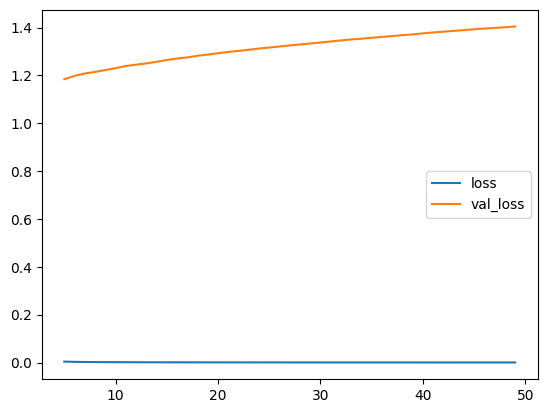

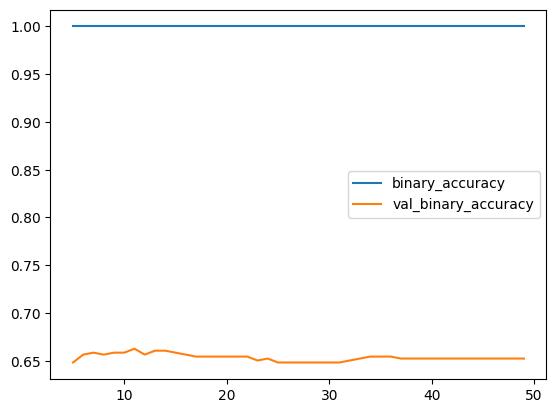

In [65]:
#Check learning curves

history_df = pd.DataFrame(model_hist.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score


# Calculate metrics
accuracy = accuracy_score(actual_sex, train_predicted_Sex_F)
precision = precision_score(actual_sex, train_predicted_Sex_F)
recall = recall_score(actual_sex, train_predicted_Sex_F)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.94
Precision: 0.93
Recall: 0.90
